In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import openpyxl

# Part 1 : Preliminary Exploratory Data Analysis


In [15]:
#Read the data
df_pricing = pd.read_csv('./data/get_around_pricing_project.csv')
df_delay = pd.read_excel('./data/get_around_delay_analysis.xlsx', sheet_name='rentals_data')
df_doc = pd.read_excel('./data/get_around_delay_analysis.xlsx', sheet_name='Documentation')

df_doc is an account of the data dictionary for the dataset. It contains the following entries:

In [377]:
with pd.option_context('display.max_colwidth', None):
  display(df_doc)

,field name,Comment
0,rental_id,Unique identifier of the rental
1,car_id,Unique identifier of the car
2,checkin_type,"Flow used for both checkin and checkout. (ie. access and return the car)\nmobile = rental agreement signed on the owner's smartphone\nconnect = car equiped with the Connect technology , opened by the driver with his smartphone.\nNote: paper contracts were excluded from the data as we have no data on their delay at checkout and it's negligible use case"
3,state,canceled means that the rental did not happen (was canceled by the driver or the owner).
4,delay_at_checkout_in_minutes,Difference in minutes between the rental end time requested by the driver when booking the car and the actual time the driver completed the checkout. Negative values mean that the driver returned the car in advance.
5,previous_ended_rental_id,id of the previous ended rental of the car (NULL when no previous rental or delay with previous rental higher than 12 hours)
6,time_delta_with_previous_rental_in_minutes,"Difference in minutes between this rental planned start time and the previous rental planned end time (when lower than 12 hours, NULL if higher)"


In [378]:
#Check the data shape
print(df_pricing.shape)
print(df_delay.shape)

(4843, 15)
(21310, 7)


## Basic Statistics for the Dataset

In [379]:
print("Number of rows : {}".format(df_delay.shape[0]))
print()

print("Display df_delay: ")
display(df_delay.head())
print()

print("Basic statistics: ")
data_desc = df_delay.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df_delay.isnull().sum()/df_delay.shape[0])

Number of rows : 21310

Display df_delay: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN



Basic statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

the 'previous_ended_rental_id' column has 91.5% missing values. Which gives us the go-ahead to not be concerned too much about the successive rentals being too close to each other.

In [380]:
print("Number of rows : {}".format(df_pricing.shape[0]))
print()

print("Display df_pricing: ")
display(df_pricing.head())
print()

print("Basic statistics: ")
data_desc = df_pricing.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df_pricing.isnull().sum()/df_pricing.shape[0])

Number of rows : 4843

Display df_pricing: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183



Basic statistics: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000



Percentage of missing values: 


Unnamed: 0                   0.0
model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

In [381]:
df_pricing.drop(['Unnamed: 0'], axis=1, inplace=True)

In [382]:
df_delay

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0
21306,573790,341965,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN


In [383]:
#clean dfs from outliers beyond and below 3 std dev for delay_at_checkout_in_minutes, mileage, rental_price_per_day and engine_power columns
df_delay = df_delay[(df_delay['delay_at_checkout_in_minutes'] < df_delay['delay_at_checkout_in_minutes'].mean() + 3*df_delay['delay_at_checkout_in_minutes'].std()) & (df_delay['delay_at_checkout_in_minutes'] > df_delay['delay_at_checkout_in_minutes'].mean() - 3*df_delay['delay_at_checkout_in_minutes'].std())]

df_pricing = df_pricing[(df_pricing['mileage'] < df_pricing['mileage'].mean() + 3*df_pricing['mileage'].std()) & (df_pricing['mileage'] > df_pricing['mileage'].mean() - 3*df_pricing['mileage'].std())]
df_pricing = df_pricing[(df_pricing['rental_price_per_day'] < df_pricing['rental_price_per_day'].mean() + 3*df_pricing['rental_price_per_day'].std()) & (df_pricing['rental_price_per_day'] > df_pricing['rental_price_per_day'].mean() - 3*df_pricing['rental_price_per_day'].std())]
df_pricing = df_pricing[(df_pricing['engine_power'] < df_pricing['engine_power'].mean() + 3*df_pricing['engine_power'].std()) & (df_pricing['engine_power'] > df_pricing['engine_power'].mean() - 3*df_pricing['engine_power'].std())]

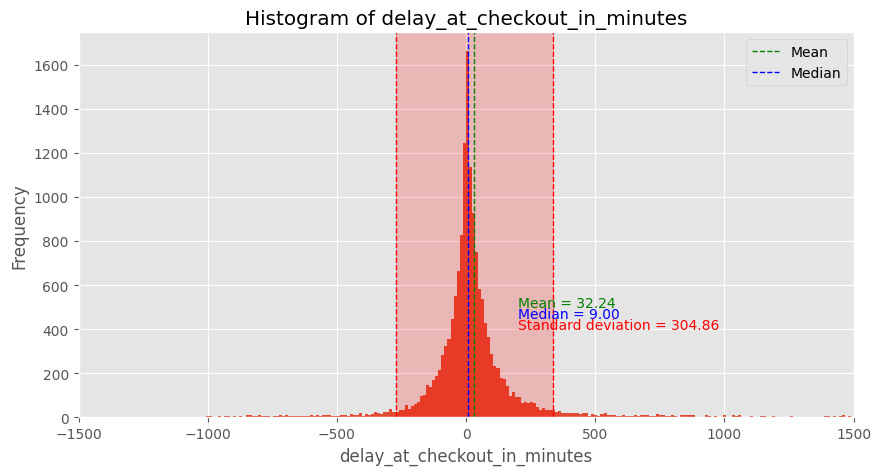

In [384]:
#histogram of delay_at_checkout_in_minutes
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.hist(df_delay['delay_at_checkout_in_minutes'], bins=500)
#add mean and median vertical lines
plt.axvline(df_delay['delay_at_checkout_in_minutes'].mean(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(df_delay['delay_at_checkout_in_minutes'].median(), color='b', linestyle='dashed', linewidth=1)
#limit x axis to -1500 to 1500
plt.xlim(-1500,1500)
#add legend
plt.legend({'Mean':df_delay['delay_at_checkout_in_minutes'].mean(),'Median':df_delay['delay_at_checkout_in_minutes'].median()})
#text annotation
plt.text(200, 500, 'Mean = {:.2f}'.format(df_delay['delay_at_checkout_in_minutes'].mean()), color='g')
plt.text(200, 450, 'Median = {:.2f}'.format(df_delay['delay_at_checkout_in_minutes'].median()), color='b')
#add standard deviation vertical lines
plt.axvline(df_delay['delay_at_checkout_in_minutes'].mean() + df_delay['delay_at_checkout_in_minutes'].std(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_delay['delay_at_checkout_in_minutes'].mean() - df_delay['delay_at_checkout_in_minutes'].std(), color='r', linestyle='dashed', linewidth=1)
#color the area between the standard deviation lines
plt.axvspan(df_delay['delay_at_checkout_in_minutes'].mean() - df_delay['delay_at_checkout_in_minutes'].std(), df_delay['delay_at_checkout_in_minutes'].mean() + df_delay['delay_at_checkout_in_minutes'].std(), alpha=0.2, color='red')
#text annotation
plt.text(200, 400, 'Standard deviation = {:.2f}'.format(df_delay['delay_at_checkout_in_minutes'].std()), color='r')

plt.title('Histogram of delay_at_checkout_in_minutes')
plt.xlabel('delay_at_checkout_in_minutes')
plt.ylabel('Frequency')
plt.show()

In [385]:
#display mean and median
print("Mean: {}".format(df_delay['delay_at_checkout_in_minutes'].mean()))
print("Median: {}".format(df_delay['delay_at_checkout_in_minutes'].median()))
#display skewness
print("Skewness: {}".format(df_delay['delay_at_checkout_in_minutes'].skew()))
#display standard deviation
print("Standard deviation: {}".format(df_delay['delay_at_checkout_in_minutes'].std()))

Mean: 32.23875645121652
Median: 9.0
Skewness: 1.8754605118788883
Standard deviation: 304.85738824906605


In [386]:
#check if the distribution is normal
from scipy.stats import shapiro
stat, p = shapiro(df_delay['delay_at_checkout_in_minutes'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.611, p=0.000
Sample does not look Gaussian (reject H0)


In [387]:
df_pricing.describe(include='all')

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4709,4709.000000,4709.000000,4709,4709,4709,4709,4709,4709,4709,4709,4709,4709,4709.000000
unique,26,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,947,NaN,NaN,4531,1583,1583,2566,3743,3778,3797,2527,3582,4388,NaN
mean,NaN,139527.367806,127.028669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.421746
std,NaN,54264.204152,35.072873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.868077
min,NaN,476.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000
25%,NaN,103626.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,141068.000000,120.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,174758.000000,135.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [388]:
df_models = df_pricing.groupby(['model_key']).mean().sort_values(by='rental_price_per_day', ascending=False)

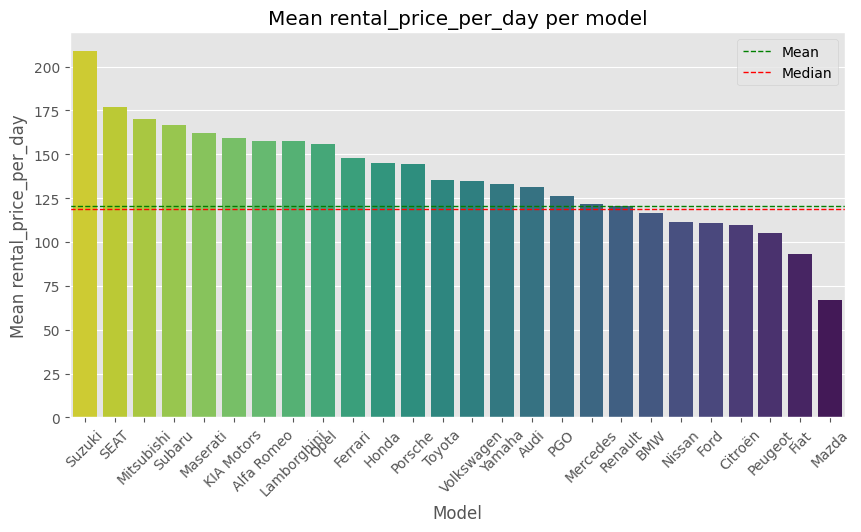

In [389]:
#seaborn barplot of the mean rental_price_per_day per model
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.barplot(x=df_models.index, y=df_models['rental_price_per_day'], palette='viridis_r')
plt.title('Mean rental_price_per_day per model')
plt.xlabel('Model')
plt.ylabel('Mean rental_price_per_day')
#display mean and median rental_price_per_day
plt.axhline(df_pricing['rental_price_per_day'].mean(), color='g', linestyle='dashed', linewidth=1, label='Mean')
plt.axhline(df_pricing['rental_price_per_day'].median(), color='r', linestyle='dashed', linewidth=1, label='Median')
#add labels
plt.legend()
plt.xticks(rotation=45)
plt.show()

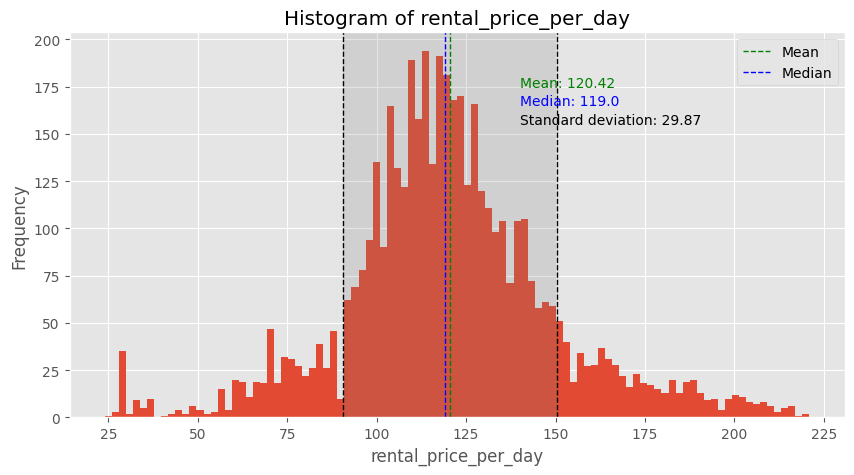

In [390]:
#display distribution of rental_price_per_day
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.hist(df_pricing['rental_price_per_day'], bins=100)
#add mean and median vertical lines
plt.axvline(df_pricing['rental_price_per_day'].mean(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(df_pricing['rental_price_per_day'].median(), color='b', linestyle='dashed', linewidth=1)
#text displaying mean and median
plt.text(140, 175, "Mean: {}".format(round(df_pricing['rental_price_per_day'].mean(),2)), fontsize=10, color='g')
plt.text(140, 165, "Median: {}".format(round(df_pricing['rental_price_per_day'].median(),2)), fontsize=10, color='b')
#text displaying standard deviation
plt.text(140, 155, "Standard deviation: {}".format(round(df_pricing['rental_price_per_day'].std(),2)), fontsize=10, color='k')
#visualizze standard deviation on the histogram
plt.axvline(df_pricing['rental_price_per_day'].mean() + df_pricing['rental_price_per_day'].std(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df_pricing['rental_price_per_day'].mean() - df_pricing['rental_price_per_day'].std(), color='k', linestyle='dashed', linewidth=1)
#color the area between the two standard deviation lines
plt.axvspan(df_pricing['rental_price_per_day'].mean() - df_pricing['rental_price_per_day'].std(), df_pricing['rental_price_per_day'].mean() + df_pricing['rental_price_per_day'].std(), alpha=0.2, color='grey')
plt.title('Histogram of rental_price_per_day')
plt.xlabel('rental_price_per_day')
plt.ylabel('Frequency')

#add legend
plt.legend({'Mean':df_pricing['rental_price_per_day'].mean(),'Median':df_pricing['rental_price_per_day'].median()})
plt.show()

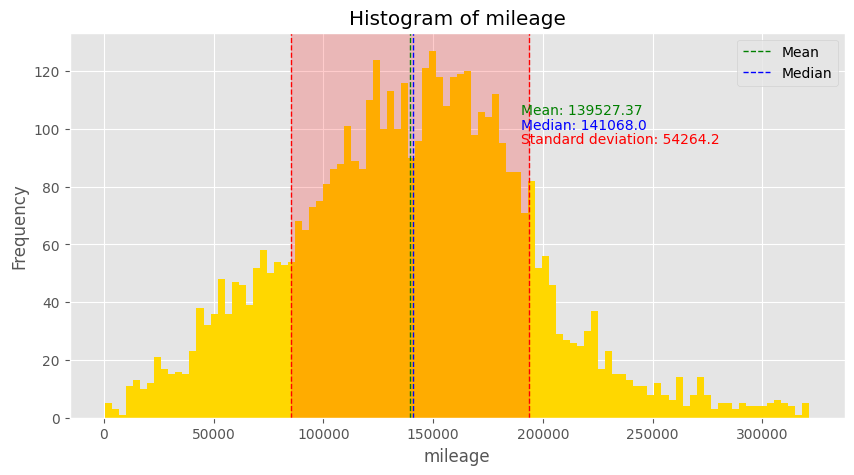

In [391]:
#display distribution of mileage
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.hist(df_pricing['mileage'], bins=100, color='gold')
#add mean and median vertical lines
plt.axvline(df_pricing['mileage'].mean(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(df_pricing['mileage'].median(), color='b', linestyle='dashed', linewidth=1)
#text displaying mean and median
plt.text(190000, 105, "Mean: {}".format(round(df_pricing['mileage'].mean(),2)), fontsize=10, color='g')
plt.text(190000, 100, "Median: {}".format(round(df_pricing['mileage'].median(),2)), fontsize=10, color='b')
#text displaying standard deviation
plt.text(190000, 95, "Standard deviation: {}".format(round(df_pricing['mileage'].std(),2)), fontsize=10, color='r')
#visualize standard deviation on the histogram
plt.axvline(df_pricing['mileage'].mean() + df_pricing['mileage'].std(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_pricing['mileage'].mean() - df_pricing['mileage'].std(), color='r', linestyle='dashed', linewidth=1)
#colorize area of standard deviation
plt.axvspan(df_pricing['mileage'].mean() - df_pricing['mileage'].std(), df_pricing['mileage'].mean() + df_pricing['mileage'].std(), alpha=0.2, color='r')
plt.title('Histogram of mileage')
plt.xlabel('mileage')
plt.ylabel('Frequency')

#add legend
plt.legend({'Mean':df_pricing['mileage'].mean(),'Median':df_pricing['mileage'].median()})
plt.show()

Most cars are used which is to be expected with a clear cut-off point at 200,000 kms for the mileage.

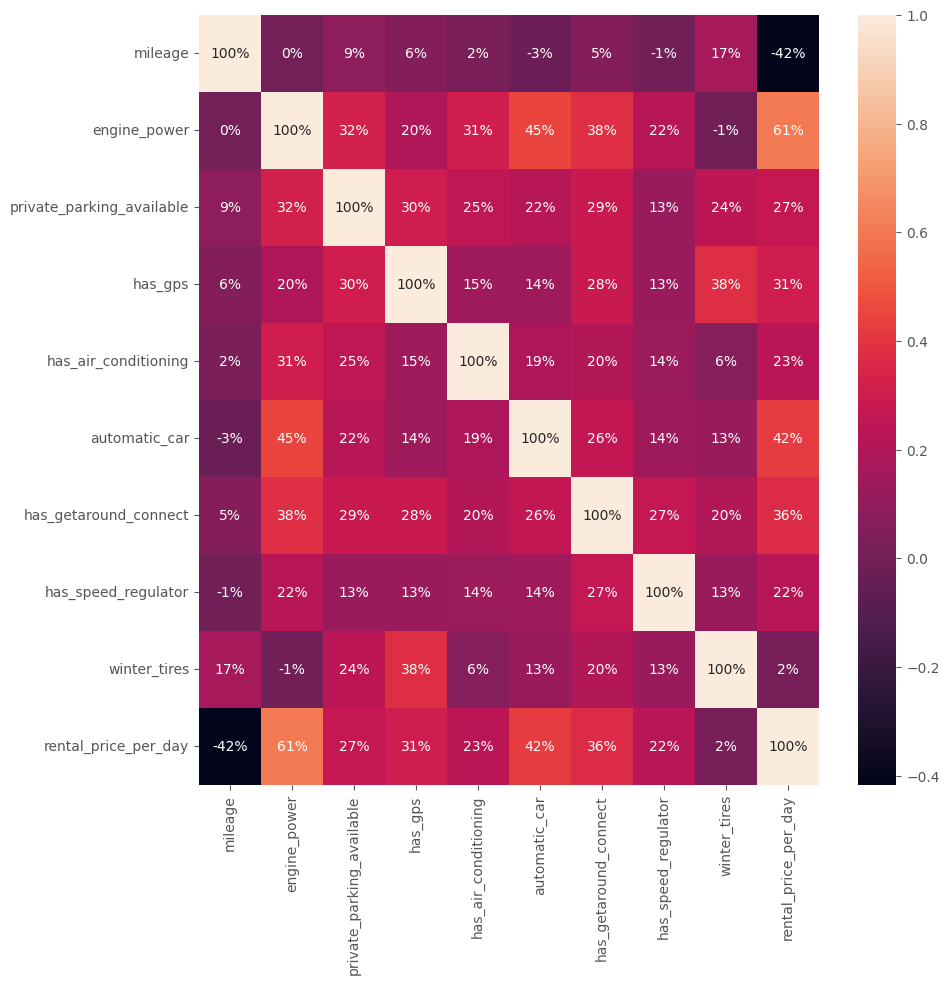

In [392]:
#Check the data correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_pricing.corr(), annot=True, fmt='.0%')
plt.show()

Rental price per day __*Positively*__ correlates with __Engine Power & having comfort options installed in the rental car__ and  __*Negatively*__ correlates with __Mileage.__ Which is expected.

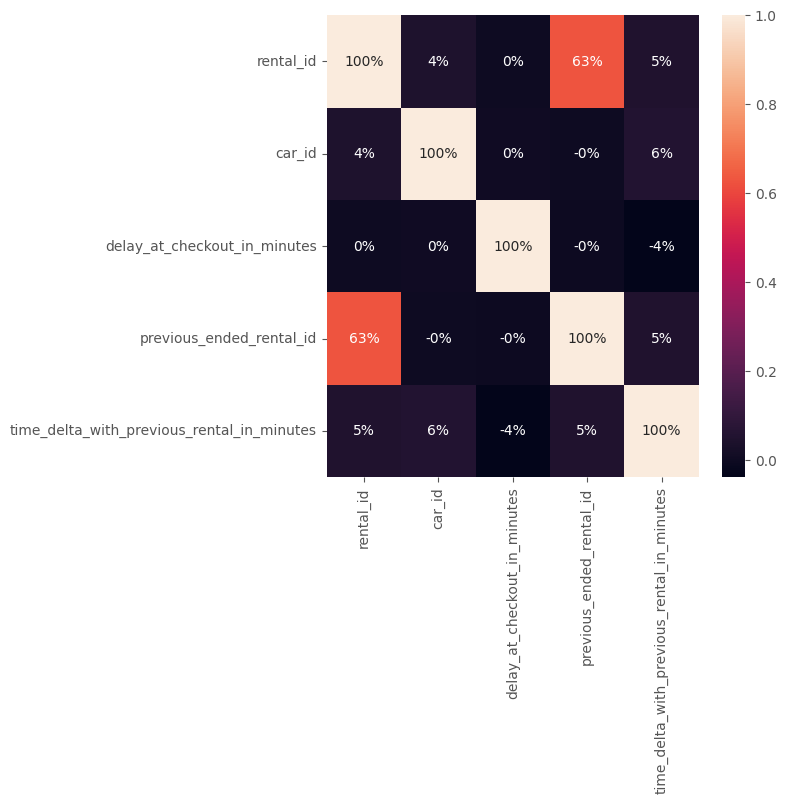

In [393]:
plt.figure(figsize=(6,6))
sns.heatmap(df_delay.corr(), annot=True, fmt='.0%')
plt.show()

In [394]:
delay_category = []
for x in df_delay['delay_at_checkout_in_minutes']:
    if x < 0:
        delay_category.append('Early')
    elif x < 15:
        delay_category.append('Late: 0-15 mins')
    elif x < 30:
        delay_category.append('Late: 15-30 mins')
    elif x < 60:
        delay_category.append('Late: 30-60 mins')
    elif x < 120:
        delay_category.append('Late: 1-2 hours')
    elif x >= 120:
        delay_category.append('Late: > 2 hours')
    else:
        delay_category.append('NaN')
df_delay['delay_category'] = delay_category
df_delay.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_category
1,507750,269550,mobile,ended,-81.0,NaN,NaN,Early
2,508131,359049,connect,ended,70.0,NaN,NaN,Late: 1-2 hours
5,511626,398802,mobile,ended,-203.0,NaN,NaN,Early
6,511639,370585,connect,ended,-15.0,563782.0,570.0,Early
7,512303,371242,mobile,ended,-44.0,NaN,NaN,Early


In [395]:
df_delay['next_rental'] = [True if x > 0 else False for x in df_delay.previous_ended_rental_id]

In [396]:
df_delay.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_category,next_rental
1,507750,269550,mobile,ended,-81.0,NaN,NaN,Early,False
2,508131,359049,connect,ended,70.0,NaN,NaN,Late: 1-2 hours,False
5,511626,398802,mobile,ended,-203.0,NaN,NaN,Early,False
6,511639,370585,connect,ended,-15.0,563782.0,570.0,Early,True
7,512303,371242,mobile,ended,-44.0,NaN,NaN,Early,False


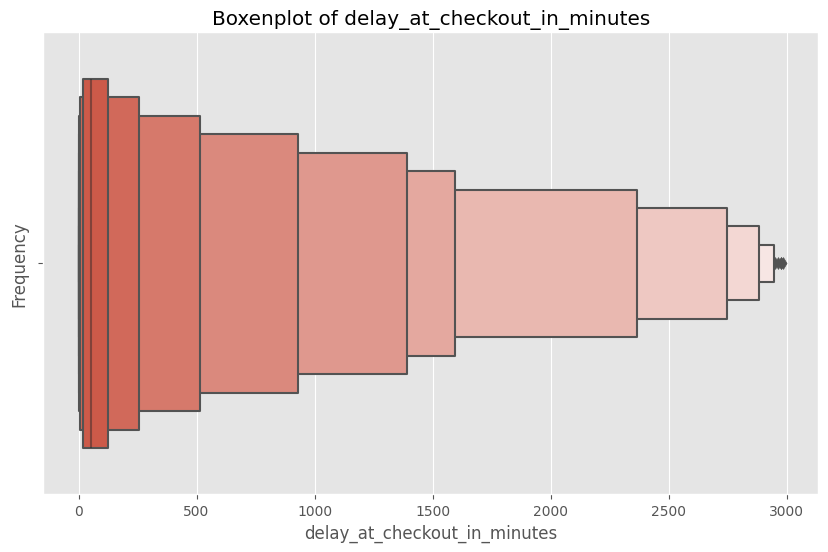

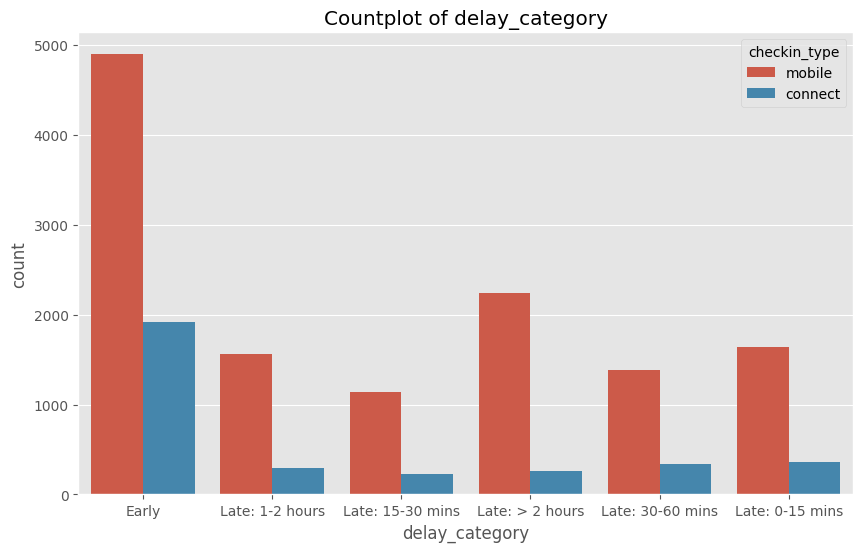

In [397]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=df_delay[df_delay['delay_category']!='Early'], x='delay_at_checkout_in_minutes',scale='linear')
plt.title('Boxenplot of delay_at_checkout_in_minutes')
plt.xlabel('delay_at_checkout_in_minutes')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df_delay, x='delay_category', hue='checkin_type')
plt.title('Countplot of delay_category')
plt.xlabel('delay_category')
plt.show()

# Part 2 : Estimating get around's lost revenue due to delays.

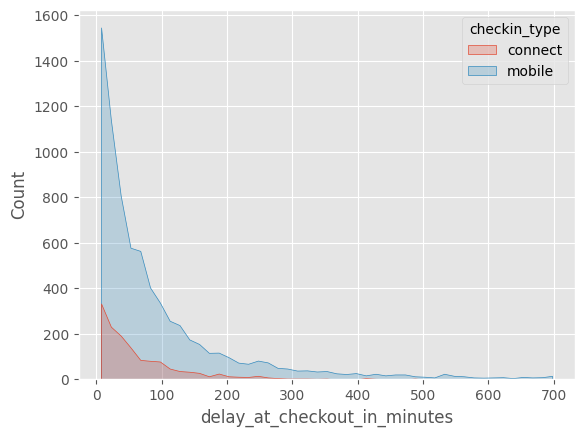

In [398]:
df_late = df_delay[df_delay["delay_at_checkout_in_minutes"] > 0]
sns.histplot(data=df_late, x="delay_at_checkout_in_minutes", hue="checkin_type", element="poly", bins=np.arange(0, 60*12, step=15)) ## (60*12) for 12 hours
plt.show()

The majority of the delays occurs with an amount inferior to 3 Hours (180 minutes).

In [399]:
#separating data into two groups based on checkin_type mobile or connect
df_delay_mobile = df_late[df_late['checkin_type'] == 'mobile']
df_delay_connect = df_late[df_late['checkin_type'] == 'connect']

#calculating median of delay_at_checkout_in_minutes for each group
print('Median of delay_at_checkout_in_minutes for mobile checkin_type: {} Min'.format(df_delay_mobile['delay_at_checkout_in_minutes'].median()))
print('Median of delay_at_checkout_in_minutes for connect checkin_type: {} Min'.format(df_delay_connect['delay_at_checkout_in_minutes'].median()))

#storing the median values in a list
medians = [df_delay_mobile['delay_at_checkout_in_minutes'].median(), df_delay_connect['delay_at_checkout_in_minutes'].median()]

#calcaulating number of data points in each group
n = [len(df_delay_mobile), len(df_delay_connect)]

print('-'*50)
#average price of rental_price_per_day for each group
print('Average rental price per day: {:.2f} $ per day'.format(df_pricing['rental_price_per_day'].mean(), ))

#average price of rental_price_per_day per minute for each group
print('Average rental price per minute: {:.2f} $ per minute'.format(df_pricing['rental_price_per_day'].mean()/1440, ))

print('-'*50)
#average cost of delay_at_checkout_in_minutes for each group
print('Number of delays for mobile checkin: {}'.format(n[0]))
print('Number of delays for connect checkin: {}'.format(n[1]))
print('Cost of delays for mobile checkin: {:.2f} $'.format(df_pricing['rental_price_per_day'].mean()/1440 * medians[0] * n[0]))
print('Cost of delays for connect checkin: {:.2f} $'.format(df_pricing['rental_price_per_day'].mean()/1440 * medians[1] * n[1]))

Median of delay_at_checkout_in_minutes for mobile checkin_type: 55.0 Min
Median of delay_at_checkout_in_minutes for connect checkin_type: 41.0 Min
--------------------------------------------------
Average rental price per day: 120.42 $ per day
Average rental price per minute: 0.08 $ per minute
--------------------------------------------------
Number of delays for mobile checkin: 7885
Number of delays for connect checkin: 1459
Cost of delays for mobile checkin: 36266.60 $
Cost of delays for connect checkin: 5002.44 $


In [400]:
df_delay.to_csv('API/df_delay.csv',index=False)
df_pricing.to_csv('API/df_pricing.csv',index=False)

# Part 3 : Determining the optimal threshold for the delay time.

Let's see how many users would be affected by setting up a threshold duration between check-in and check-out.

In [17]:
df_threshold = df_delay.dropna(subset=['time_delta_with_previous_rental_in_minutes'])
df_threshold['delta'] = df_threshold['time_delta_with_previous_rental_in_minutes'] - df_threshold['delay_at_checkout_in_minutes']

occurences = len(df_threshold[df_threshold['delta'] < 0])
occ_percent = occurences / len(df_delay) * 100

print('Number of occurences: {}'.format(occurences))
print('Percentage of occurences: {:.2f} %'.format(occ_percent))

print(f"{len(df_threshold[df_threshold['delta'] < -30])} drivers are more than 30 minutes late")
print(f"Implementing a 30 minutes delay would impact {len(df_threshold[df_threshold['time_delta_with_previous_rental_in_minutes'] < 30])} drivers")

Number of occurences: 270
Percentage of occurences: 1.27 %
191 drivers are more than 30 minutes late
Implementing a 30 minutes delay would impact 279 drivers


In [18]:
threshold_range = np.arange(0, 60*12, step=15) # 15min intervals for 12 hours
impacted_list_mobile = []
impacted_list_connect = []
impacted_list_total = []
solved_list_mobile = []
solved_list_connect = []
solved_list_total = []

solved_list = []
for t in threshold_range:
    impacted = df_threshold.dropna(subset=['time_delta_with_previous_rental_in_minutes'])
    connect_impact = impacted[impacted['checkin_type'] == 'connect']
    mobile_impact = impacted[impacted['checkin_type'] == 'mobile']
    connect_impact = connect_impact[connect_impact['time_delta_with_previous_rental_in_minutes'] < t]
    mobile_impact = mobile_impact[mobile_impact['time_delta_with_previous_rental_in_minutes'] < t]
    impacted = impacted[impacted['time_delta_with_previous_rental_in_minutes'] < t]
    impacted_list_connect.append(len(connect_impact))
    impacted_list_mobile.append(len(mobile_impact))
    impacted_list_total.append(len(impacted))

    solved = df_threshold[df_threshold['delta'] < 0]
    connect_solved = solved[solved['checkin_type'] == 'connect']
    mobile_solved = solved[solved['checkin_type'] == 'mobile']
    connect_solved = connect_solved[connect_solved['delay_at_checkout_in_minutes'] < t]
    mobile_solved = mobile_solved[mobile_solved['delay_at_checkout_in_minutes'] < t]
    solved = solved[solved['delay_at_checkout_in_minutes'] < t]
    solved_list_connect.append(len(connect_solved))
    solved_list_mobile.append(len(mobile_solved))
    solved_list_total.append(len(solved))

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
%matplotlib inline

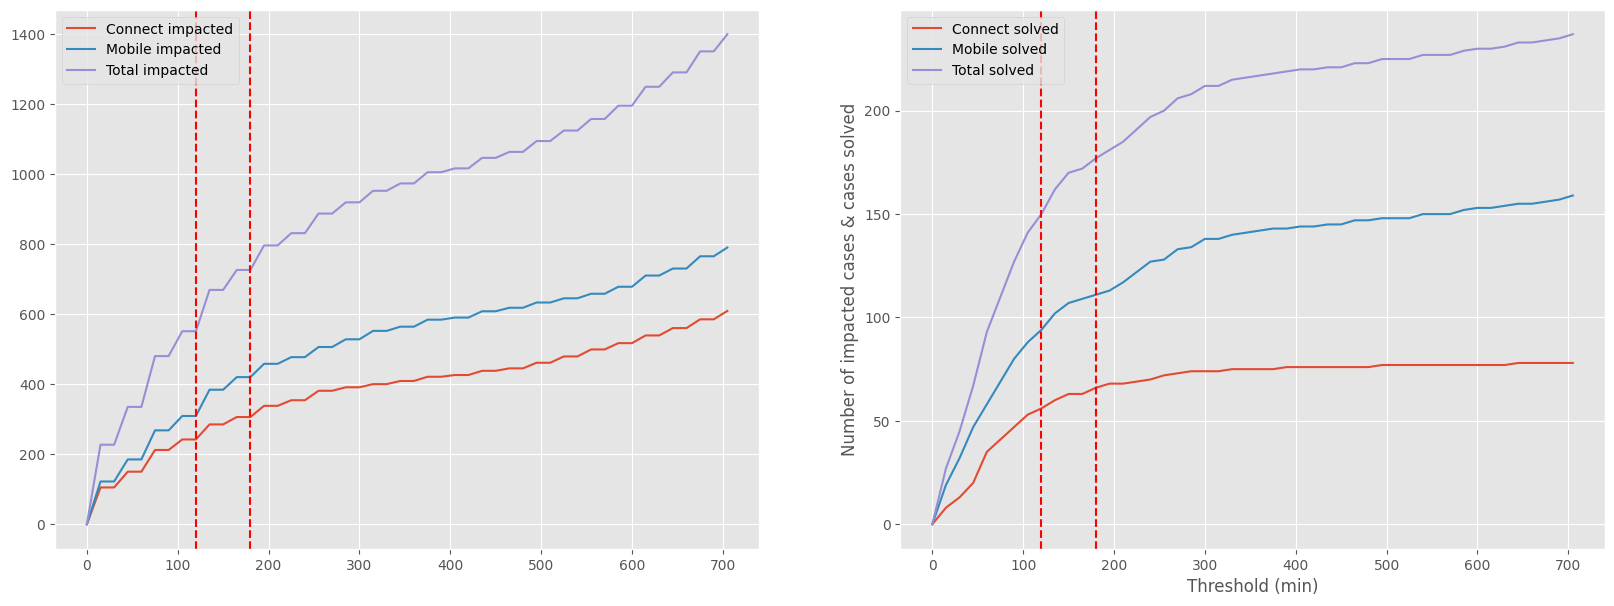

In [427]:
ax = fig.add_subplot(1, 1, 1)
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(20,7))
ax[1].plot(threshold_range, solved_list_connect)
ax[1].plot(threshold_range, solved_list_mobile)
ax[1].plot(threshold_range, solved_list_total)
ax[0].plot(threshold_range, impacted_list_connect)
ax[0].plot(threshold_range, impacted_list_mobile)
ax[0].plot(threshold_range, impacted_list_total)
ax[1].set_xlabel('Threshold (min)')
ax[1].set_ylabel('Number of impacted cases & cases solved')
ax[1].legend(['Connect solved','Mobile solved','Total solved'], loc='upper left')
ax[0].legend(['Connect impacted','Mobile impacted','Total impacted'], loc='upper left')
#display gradient of the line
ax[1].axvline(x=120, color='r', linestyle='--')
ax[1].axvline(x=180, color='r', linestyle='--')
ax[0].axvline(x=120, color='r', linestyle='--')
ax[0].axvline(x=180, color='r', linestyle='--')
plt.show()

---


In [3]:
df_delay1 = pd.read_excel('./data/get_around_delay_analysis.xlsx', sheet_name='rentals_data')

In [4]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

In [5]:
mask = (df_delay1['previous_ended_rental_id'].isnull() == False)
df_previous = df_delay1[mask].copy()

In [6]:
def get_previous_info(r_id) :
    previous_index = df_delay1['rental_id'].loc[lambda x: x==r_id].index[0]
    return [df_delay1.loc[previous_index,'delay_at_checkout_in_minutes'], df_delay1.loc[previous_index,'checkin_type']]

In [7]:
df_previous['previous_delay_at_checkout_in_minutes'],  df_previous['previous_checkin_type'] = zip(*df_previous['previous_ended_rental_id'].apply(get_previous_info))

In [8]:
df_previous['delay_checkin'] = df_previous['previous_delay_at_checkout_in_minutes'] - df_previous['time_delta_with_previous_rental_in_minutes']
df_previous['late_checkin'] = df_previous['delay_checkin'].apply(lambda x : 1 if x > 0 else 0)

In [9]:
df_temp = df_previous.groupby(['time_delta_with_previous_rental_in_minutes', 'checkin_type'], as_index = False).sum()
df_temp.head()

,time_delta_with_previous_rental_in_minutes,checkin_type,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,previous_delay_at_checkout_in_minutes,delay_checkin,late_checkin
0,0.0,connect,72482942,45624940,-2116.0,72270057.0,-8189.0,-8189.0,40
1,0.0,mobile,81559003,52831025,12615.0,81086818.0,1291.0,1291.0,76
2,30.0,connect,27521627,16480187,-1314.0,27599181.0,-2559.0,-4059.0,8
3,30.0,mobile,39784958,25412336,2651.0,39484110.0,352.0,-1748.0,22
4,60.0,connect,43762815,27629410,-2135.0,43616287.0,-8392.0,-12892.0,8


In [10]:
def checkin_solved(previous_delay, threshold, state, late_next_checkin) :
    # determine if the rental was canceled when there is late previous checkout and if it will be solved with the threshold      
    if (late_next_checkin == 1) & (state == 'canceled') & (previous_delay < threshold) :
        return 1
    else :
        return 0

In [11]:
def late_solved(previous_delay, threshold, late_next_checkin) :
    # determine if the rental was in danger due to late previous checkout and if it will be solved with the threshold      
    if (late_next_checkin == 1) & (previous_delay < threshold) :
        return 1
    else :
        return 0

In [21]:
for item in threshold_range :
    df_previous[f'threshold_{item}'] = df_previous['time_delta_with_previous_rental_in_minutes'].apply(lambda x : 1 if x < item else 0) # no effect if the time delta is less than the threshold
    df_previous[f'checkin_solved_{item}'] = list(map(checkin_solved, df_previous['previous_delay_at_checkout_in_minutes'], [item] * df_previous.shape[0], df_previous['state'], df_previous['late_checkin'])) # find canceled rentals that would be solved with the threshold
    df_previous[f'late_solved_{item}'] = list(map(late_solved, df_previous['previous_delay_at_checkout_in_minutes'], [item] * df_previous.shape[0], df_previous['late_checkin'])) # find late rentals that would be solved with the threshold

df_previous

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_delay_at_checkout_in_minutes,previous_checkin_type,delay_checkin,...,late_solved_660,threshold_675,checkin_solved_675,late_solved_675,threshold_690,checkin_solved_690,late_solved_690,threshold_705,checkin_solved_705,late_solved_705
6,511639,370585,connect,ended,-15.0,563782.0,570.0,136.0,connect,-434.0,...,0,1,0,0,1,0,0,1,0,0
19,519491,312389,mobile,ended,58.0,545639.0,420.0,140.0,mobile,-280.0,...,0,1,0,0,1,0,0,1,0,0
23,521156,392479,mobile,ended,NaN,537298.0,0.0,NaN,mobile,NaN,...,0,1,0,0,1,0,0,1,0,0
34,525044,349751,mobile,ended,NaN,510607.0,60.0,-113.0,mobile,-173.0,...,0,1,0,0,1,0,0,1,0,0
40,528808,181625,connect,ended,-76.0,557404.0,330.0,-352.0,connect,-682.0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21269,568049,381499,connect,canceled,NaN,562174.0,720.0,73.0,connect,-647.0,...,0,0,0,0,0,0,0,0,0,0
21272,568241,396409,mobile,canceled,NaN,566136.0,570.0,16.0,mobile,-554.0,...,0,1,0,0,1,0,0,1,0,0
21275,568523,297973,mobile,ended,12.0,567121.0,240.0,-275.0,mobile,-515.0,...,0,1,0,0,1,0,0,1,0,0
21286,569717,377312,mobile,ended,230.0,545045.0,90.0,22.0,mobile,-68.0,...,0,1,0,0,1,0,0,1,0,0


In [22]:
df_temp = df_previous.groupby(['checkin_type'], as_index=False).sum()


In [23]:
df_temp.loc[2,:] = df_temp.iloc[0,:] + df_temp.iloc[1,:]
df_temp.loc[2,'checkin_type'] = 'connect + mobile'

In [24]:
df_temp = pd.melt(df_temp, id_vars=['checkin_type'], var_name='impacts', value_name='nb_affected')

In [25]:
df_temp_total = df_temp[df_temp['impacts'].str.contains('threshold', case=False, regex=False)].copy()
df_temp_total['threshold_range'] = df_temp_total['impacts'].apply(lambda x : x.split('_')[1])
df_temp_total

,checkin_type,impacts,nb_affected,threshold_range
24,connect,threshold_0,0.0,0
25,mobile,threshold_0,0.0,0
26,connect + mobile,threshold_0,0.0,0
33,connect,threshold_15,131.0,15
34,mobile,threshold_15,148.0,15
...,...,...,...,...
439,mobile,threshold_690,923.0,690
440,connect + mobile,threshold_690,1646.0,690
447,connect,threshold_705,755.0,705
448,mobile,threshold_705,956.0,705


In [26]:
df_temp_total['affected_revenue_in_percent_total_rentals'] = df_temp_total['nb_affected'] / df_delay1.shape[0] * 100
df_temp_total['affected_revenue_in_percent_successive_rentals'] = df_temp_total['nb_affected'] / df_previous.shape[0] * 100
df_temp_total

,checkin_type,impacts,nb_affected,threshold_range,affected_revenue_in_percent_total_rentals,affected_revenue_in_percent_successive_rentals
24,connect,threshold_0,0.0,0,0.000000,0.000000
25,mobile,threshold_0,0.0,0,0.000000,0.000000
26,connect + mobile,threshold_0,0.0,0,0.000000,0.000000
33,connect,threshold_15,131.0,15,0.614735,7.115698
34,mobile,threshold_15,148.0,15,0.694510,8.039109
...,...,...,...,...,...,...
439,mobile,threshold_690,923.0,690,4.331300,50.135796
440,connect + mobile,threshold_690,1646.0,690,7.724073,89.407930
447,connect,threshold_705,755.0,705,3.542938,41.010320
448,mobile,threshold_705,956.0,705,4.486157,51.928300


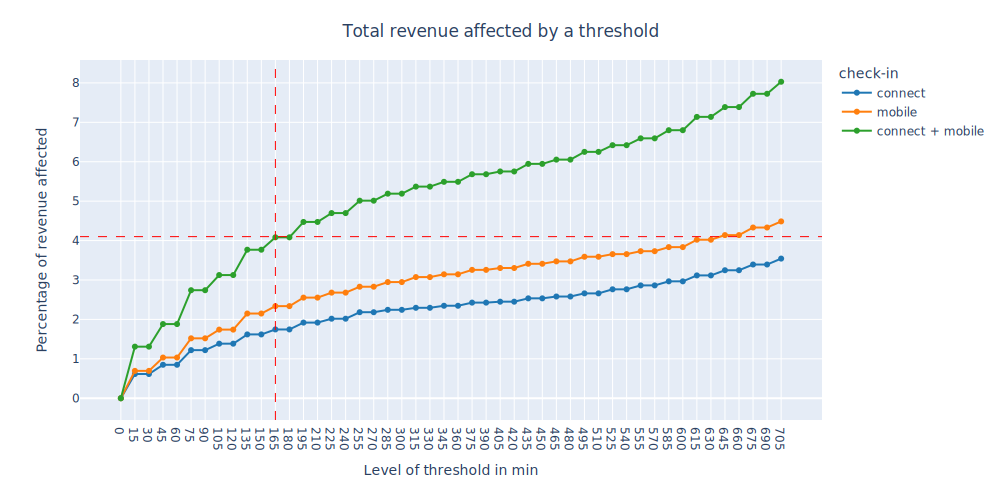

In [36]:
fig = px.line(df_temp_total, x = 'threshold_range', y = 'affected_revenue_in_percent_total_rentals',
                markers = True,
                color = 'checkin_type',
                color_discrete_map={'connect':'#1f77b4', 'mobile':'#ff7f0e', 'connect + mobile':'#2ca02c'},
            )
fig.update_layout(yaxis_title='Percentage of revenue affected',
                    xaxis_title='Level of threshold in min',
                    legend_title = 'check-in',
                    title={'text': "Total revenue affected by a threshold", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    autosize=False,
                    height=500,
                    width=1000,
                    barnorm='percent',
                    )
#add vertical line at 120 and 180 min
fig.add_vline(x=11, line_width=1, line_dash="dash", line_color="red")
fig.add_hline(y=4.1, line_width=1, line_dash="dash", line_color="red")
fig.show()

# Conclusion

The optimal threshold for the delay time is 165 minutes. This would allow getaround to keep 90% of its users and losing only 4.1 % of its projected revenue. This is a good compromise between keeping the majority of the users and keeping the revenue.
